In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n=100, ro=2):
    x1 = np.random.multivariate_normal(mean=[0,0], cov=np.identity(2),size=n)
    x2 = np.random.multivariate_normal(mean=[ro,ro], cov=np.identity(2),size=n)
    y1 = np.array([1 for i in range(n)])
    y2 = np.array([-1 for i in range(n)])
    y = np.concatenate((y1,y2))
    x = np.concatenate((x1,x2))
    idx = np.random.permutation(2*n)
    x = x[idx,:]
    y = y[idx]
    return x,y

def sgn(x):
    return x / abs(x)

def accuracy(y, y_hat):
    return sum(y == y_hat)/len(y)

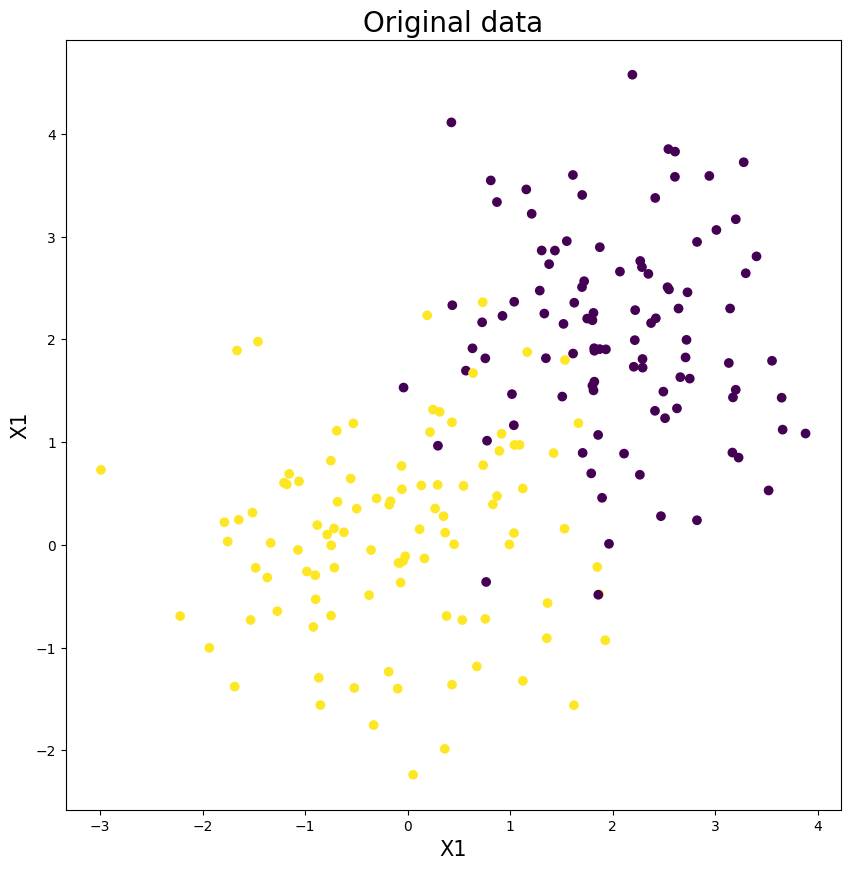

In [2]:
x,y = generate_data(ro=2)

plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlabel("X1", fontsize=15)
plt.ylabel("X1", fontsize=15)
plt.title("Original data", fontsize=20)
plt.show()

In [3]:
np.column_stack((x, np.ones(200))) # adding ones

array([[-4.97955947e-01,  3.51603835e-01,  1.00000000e+00],
       [ 2.82029345e+00,  2.38931889e-01,  1.00000000e+00],
       [ 1.28735535e+00,  2.47473661e+00,  1.00000000e+00],
       [ 3.64589171e+00,  1.43196786e+00,  1.00000000e+00],
       [ 8.69763840e-01,  3.33661847e+00,  1.00000000e+00],
       [ 2.37282009e+00,  2.15868502e+00,  1.00000000e+00],
       [ 2.21406133e+00,  1.99226608e+00,  1.00000000e+00],
       [-3.57865153e-01, -5.05715869e-02,  1.00000000e+00],
       [ 1.81972761e+00,  1.88881589e+00,  1.00000000e+00],
       [ 3.27603919e+00,  3.72433397e+00,  1.00000000e+00],
       [ 7.56728320e-01, -7.21074637e-01,  1.00000000e+00],
       [ 6.31217009e-01,  1.91276452e+00,  1.00000000e+00],
       [ 1.43491995e+00,  2.86439684e+00,  1.00000000e+00],
       [-8.51779361e-01, -1.55980730e+00,  1.00000000e+00],
       [ 1.70547290e+00,  8.94705240e-01,  1.00000000e+00],
       [ 2.94071509e+00,  3.59084748e+00,  1.00000000e+00],
       [-6.92221420e-01,  1.11075693e+00

In [4]:
from Algorithm import CoordinateDescent

cd = CoordinateDescent(C=2)
cd.fit(np.column_stack((x, np.ones(200))),y)

In [5]:
w = cd.process()

In [6]:
w # the last one is the bias

array([-0.72287413, -0.54478462,  1.36817949])

In [7]:
y_hat = (w[0:-1] @ x.T) + w[-1]
y_hat = sgn(y_hat)

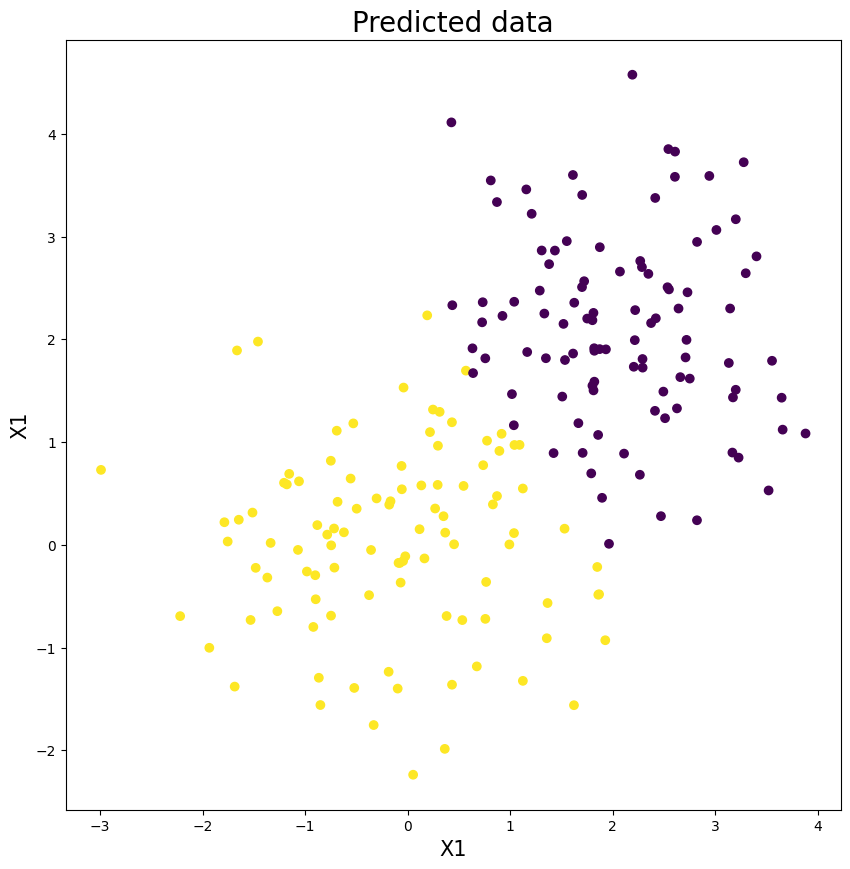

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], c=y_hat)
plt.xlabel("X1", fontsize=15)
plt.ylabel("X1", fontsize=15)
plt.title("Predicted data", fontsize=20)
plt.show()

In [9]:
accuracy(y, y_hat)

0.94